# Random Forest Q2 (Fraud check)

Use Random ForestRandom Forest to prepare a model on fraud data   
treating those who have   taxable_income <= 30000 as "Risky" and others are "Good"



# 1. Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 2. Import Data

In [2]:
fraud_check = pd.read_csv('Fraud_check.csv')
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# 3. EDA

In [3]:
fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
fraud_check.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

### checking outliers

C:\Users\shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

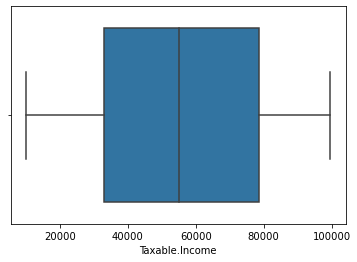

In [6]:
sns.boxplot(fraud_check['Taxable.Income'])

#### There are no outliers in the data

Skewness = 0.030014788906377175
Kurtosis = -1.1997824607083138


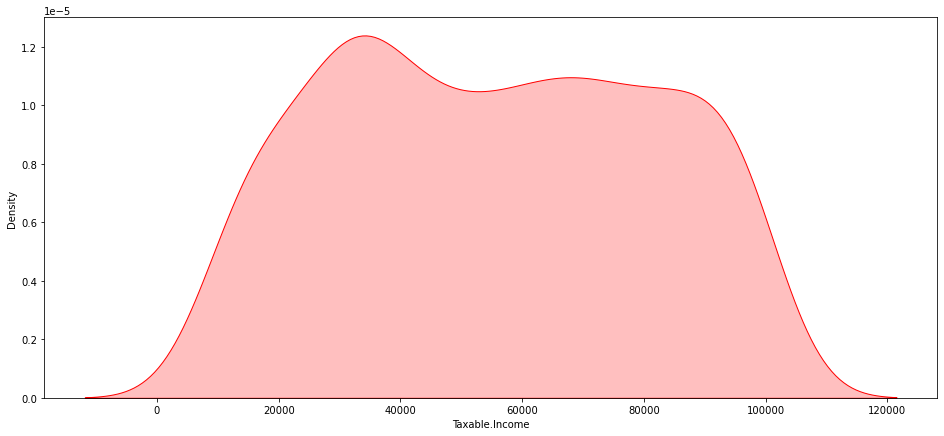

In [7]:
plt.figure(figsize=(16,7))
print("Skewness =",fraud_check['Taxable.Income'].skew())
print("Kurtosis =",fraud_check['Taxable.Income'].kurtosis())
sns.kdeplot(fraud_check['Taxable.Income'],shade=True,color='r')
plt.show()

#### Sales Data is skewed to the right and Data has negative kurtosis

In [8]:
obj_colum = fraud_check.select_dtypes(include='object')
obj_colum

,Undergrad,Marital.Status,Urban
0,NO,Single,YES
1,YES,Divorced,YES
2,NO,Married,YES
3,YES,Single,YES
4,NO,Married,NO
...,...,...,...
595,YES,Divorced,YES
596,YES,Divorced,YES
597,NO,Divorced,YES
598,YES,Married,NO


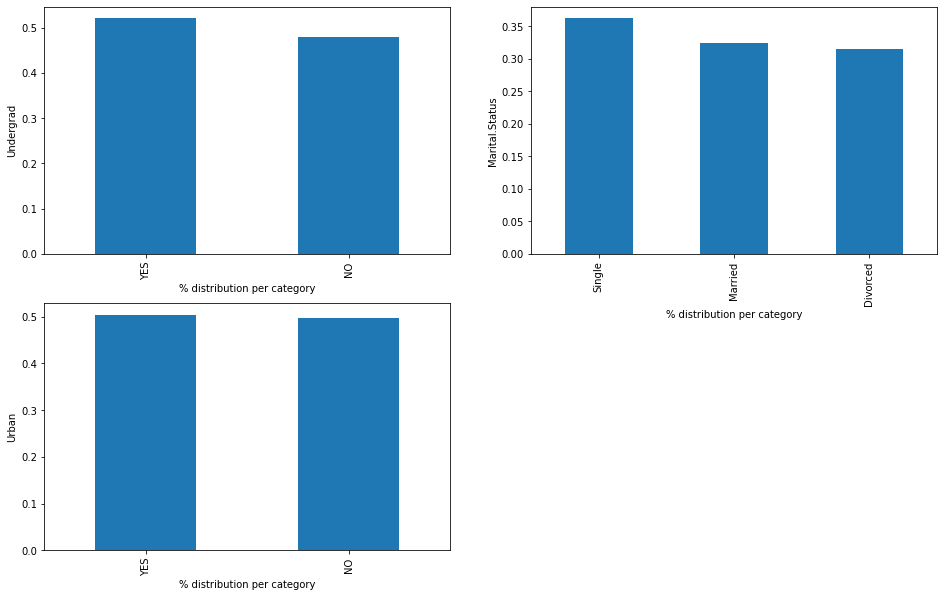

In [9]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    fraud_check[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')


In [10]:
num_columns = fraud_check.select_dtypes(include=['float64','int64'])
num_columns

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28
...,...,...,...
595,76340,39492,7
596,69967,55369,2
597,47334,154058,0
598,98592,180083,17


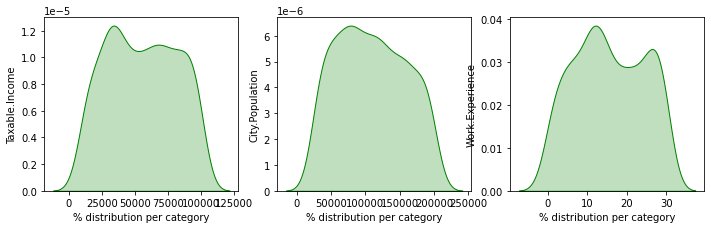

In [11]:
plt.figure(figsize=(16,30))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(fraud_check[col],color='g',shade=True)
    plt.ylabel(col)
    plt.xlabel('% distribution per category')

In [12]:
pd.DataFrame(data=[num_columns.skew(),num_columns.kurtosis()],index=['skewness','kurtosis'])

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [13]:
df = pd.get_dummies(fraud_check, columns = ['Undergrad','Marital.Status','Urban'])

In [14]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [15]:
corr = df.corr()

<AxesSubplot:>

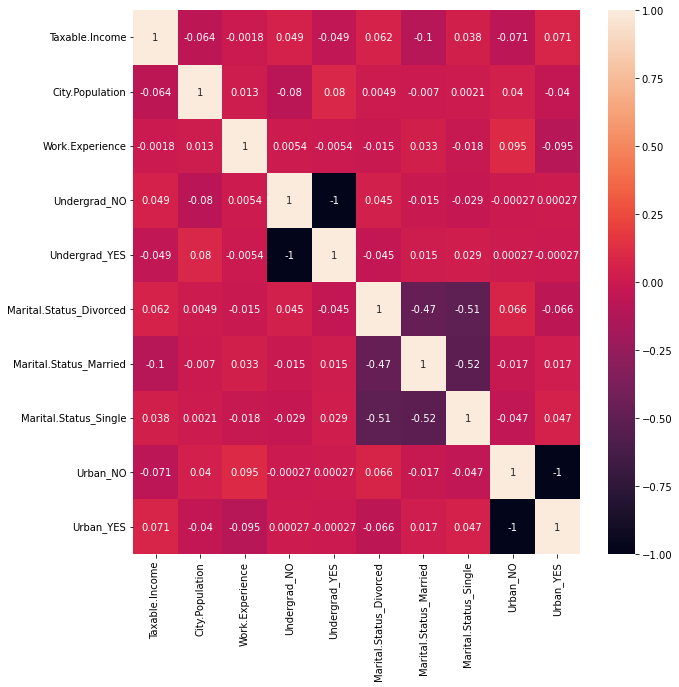

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# 4. Model Building

#### Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [17]:
df["Taxable.Income"]

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

### for <= 30000 = "Risky" and > 30000 = "Good"

#### Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable.

In [18]:
df['Taxable.Income'] = pd.cut(df["Taxable.Income"],bins=[0,30000,100000],labels=['Riskey','Good'])

#### Droping the Sales column

In [19]:
df.head(20)

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
5,Good,116382,0,1,0,1,0,0,1,0
6,Good,80890,8,1,0,1,0,0,0,1
7,Good,131253,3,0,1,0,0,1,0,1
8,Good,102481,12,1,0,0,0,1,0,1
9,Good,155482,4,0,1,1,0,0,0,1


In [20]:
x = df.iloc[:,1:10]
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [21]:
y =df['Taxable.Income']

df['Taxable.Income'].value_counts()

Good      476
Riskey    124
Name: Taxable.Income, dtype: int64

# 5. Model Traning

##  Decision Tree - Model using Entropy Criteria and Gini Criteria

### Splitting data into training and testing data set

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y)

In [23]:
y_train.value_counts()

Good      381
Riskey     99
Name: Taxable.Income, dtype: int64

## Building Decision Tree Classifier using Entropy Criteria

In [24]:
model =RandomForestClassifier(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7354166666666667

In [25]:
pred_train = model.predict(x_train)

#### accuracy check

In [26]:
accuracy_score(y_train,pred_train)

1.0

In [27]:
confusion_matrix(y_train,pred_train)

array([[381,   0],
       [  0,  99]], dtype=int64)

In [28]:
pred_test = model.predict(x_test)

#### accuracy check

In [29]:
accuracy_score(y_test,pred_test)

0.7416666666666667

In [30]:
confusion_matrix(y_test,pred_test)

array([[89,  6],
       [25,  0]], dtype=int64)

In [31]:
df_Entropy=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})


In [32]:
df_Entropy

,Actual,Predicted
268,Good,Good
304,Good,Good
3,Good,Good
504,Good,Riskey
482,Good,Good
...,...,...
226,Good,Good
580,Good,Good
65,Good,Good
384,Good,Good


In [33]:
model.feature_importances_

array([0.51998125, 0.3539363 , 0.01847467, 0.01735566, 0.01921622,
       0.02041587, 0.01673166, 0.01754803, 0.01634033])

In [34]:
feature_importance = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [35]:
feature_importance

,feature,importance
0,City.Population,0.519981
1,Work.Experience,0.353936
5,Marital.Status_Married,0.020416
4,Marital.Status_Divorced,0.019216
2,Undergrad_NO,0.018475
7,Urban_NO,0.017548
3,Undergrad_YES,0.017356
6,Marital.Status_Single,0.016732
8,Urban_YES,0.016340


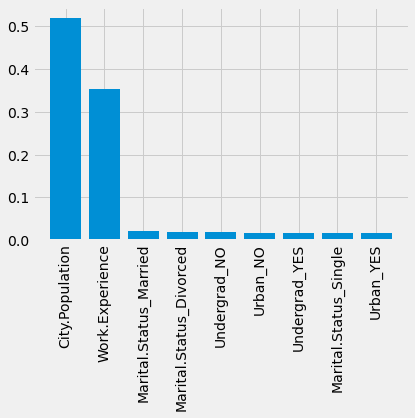

In [36]:
plt.style.use('fivethirtyeight')
plt.bar(feature_importance['feature'],feature_importance['importance'], orientation = 'vertical')
plt.xticks(rotation = 90)
plt.show()

#### As seen in the above chart, City.Population is most important feature

# END